# 1. <a id='toc1_'></a>[__Demo: Implementing a Variational Autoencoder (VAE) with TensorFlow for Image Generation Using the MNIST Dataset__](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- 1. [__Demo: Implementing a Variational Autoencoder (VAE) with TensorFlow for Image Generation Using the MNIST Dataset__](#toc1_)    
- 2. [__Steps to Perform__](#toc2_)    
- 3. [__Step 1: Import the Necessary Libraries__](#toc3_)    
- 4. [__Step 2: Load the MNIST Dataset__](#toc4_)    
  - 4.1. [__Step 2 Code Explanation__](#toc4_1_)    
    - 4.1.1. [__Code Breakdown__](#toc4_1_1_)    
    - 4.1.2. [__Summary__](#toc4_1_2_)    
- 5. [__Step 3: Set Hyperparameters__](#toc5_)    
  - 5.1. [__Step 3 Code Explanation__](#toc5_1_)    
    - 5.1.1. [__Code Breakdown__](#toc5_1_1_)    
    - 5.1.2. [__Summary__](#toc5_1_2_)    
- 6. [__Step 4: Define Model Architecture__](#toc6_)    
  - 6.1. [__Step 4 Explanation__](#toc6_1_)    
    - 6.1.1. [__Code Breakdown__](#toc6_1_1_)    
      - 6.1.1.1. [__Latent Space Dimension__](#toc6_1_1_1_)    
      - 6.1.1.2. [__Encoder Definition__](#toc6_1_1_2_)    
      - 6.1.1.3. [__Decoder Definition__](#toc6_1_1_3_)    
    - 6.1.2. [__Summary__](#toc6_1_2_)    
  - 6.2. [__When to Use a `Flatten` Layer__](#toc6_2_)    
  - 6.3. [__Explanation of the Choice of Neurons and Activation Function__](#toc6_3_)    
- 7. [__Step 5: Define the Sampling Function__](#toc7_)    
  - 7.1. [__Step 5 Code Explanation__](#toc7_1_)    
    - 7.1.1. [__Code Breakdown__](#toc7_1_1_)    
    - 7.1.2. [__Summary__](#toc7_1_2_)    
- 8. [__Step 6: Connect the Encoder and the Decoder__](#toc8_)    
  - 8.1. [__Step 6 Code Explanation__](#toc8_1_)    
    - 8.1.1. [__Code Breakdown__](#toc8_1_1_)    
    - 8.1.2. [__Summary__](#toc8_1_2_)    
- 9. [__Step 7: Define the Loss Function and Compile the Model__](#toc9_)    
  - 9.1. [__Step 7 Code Explanation__](#toc9_1_)    
    - 9.1.1. [__Summary__](#toc9_1_1_)    
- 10. [__Step 8: Train the Model__](#toc10_)    
- 11. [__Step 9: Generate a Manifold of Digits__](#toc11_)    
- 12. [__Conclusion__](#toc12_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 2. <a id='toc2_'></a>[__Steps to Perform__](#toc0_)

- Step 1: Import the Necessary Libraries

- Step 2: Load the MNIST Dataset

- Step 3: Set Hyperparameters

- Step 4: Define Model Architecture

- Step 5: Define the Sampling Function

- Step 6: Connect the Encoder and Decoder

- Step 7: Define the Loss Function and Compile the Model

- Step 8: Train the Model

- Step 9: Generate a Manifold of Digits

# 3. <a id='toc3_'></a>[__Step 1: Import the Necessary Libraries__](#toc0_)
- Import numpy, matplotlib.pyplot, and tensorflow.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-01-27 18:03:33.145814: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-27 18:03:35.465891: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-27 18:03:35.494702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-

VOC-NOTICE: GPU memory for this assignment is capped at 2048MiB


# 4. <a id='toc4_'></a>[__Step 2: Load the MNIST Dataset__](#toc0_)

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## 4.1. <a id='toc4_1_'></a>[__Step 2 Code Explanation__](#toc0_)

### 4.1.1. <a id='toc4_1_1_'></a>[__Code Breakdown__](#toc0_)

The provided code snippet demonstrates how to load and preprocess the MNIST dataset using TensorFlow and Keras. The MNIST dataset is a well-known dataset in the machine learning community, consisting of 70,000 grayscale images of handwritten digits (0-9), each of size 28x28 pixels. This dataset is commonly used for training and evaluating image classification models.

1. **Loading the MNIST Dataset:**
   ```python
   mnist = tf.keras.datasets.mnist
   ```
   This line imports the MNIST dataset from the `tf.keras.datasets` module. TensorFlow provides easy access to several popular datasets, including MNIST, through the `tf.keras.datasets` module.

2. **Splitting the Dataset:**
   ```python
   (x_train, _), (x_test, _) = mnist.load_data()
   ```
   The `mnist.load_data()` function loads the MNIST dataset and returns two tuples: `(x_train, y_train)` and `(x_test, y_test)`. These tuples contain the training and testing data, respectively. The `x_train` and `x_test` variables contain the images, while the `y_train` and `y_test` variables contain the corresponding labels. In this snippet, the labels are not needed, so they are ignored using the underscore `_`.

3. **Normalizing the Data:**
   ```python
   x_train, x_test = x_train / 255.0, x_test / 255.0
   ```
   This line normalizes the pixel values of the images to the range [0, 1]. The original pixel values range from 0 to 255, so dividing by 255.0 scales the values to the desired range. Normalization is an important preprocessing step that helps improve the performance and convergence of neural network models by ensuring that the input data has a consistent scale.

### 4.1.2. <a id='toc4_1_2_'></a>[__Summary__](#toc0_)

The code snippet loads and preprocesses the MNIST dataset using TensorFlow and Keras. The MNIST dataset is imported from the `tf.keras.datasets` module, and the `load_data()` function is used to split the dataset into training and testing sets. The pixel values of the images are then normalized to the range [0, 1] by dividing by 255.0. This preprocessing step is essential for preparing the data for training neural network models, as it ensures that the input data has a consistent scale, which can improve model performance and convergence.

# 5. <a id='toc5_'></a>[__Step 3: Set Hyperparameters__](#toc0_)
-  Define the `learning_rate`, `num_steps`, and `batch_size`.
- `learning_rate` is the step size at each iteration while moving toward a minimum of a loss function.
- `num_steps` is the number of steps you want to train the model.
- `batch_size` is the number of samples that will be propagated through the network.

In [ ]:
learning_rate = 0.001
num_steps = 100
batch_size = 64

## 5.1. <a id='toc5_1_'></a>[__Step 3 Code Explanation__](#toc0_)

The provided code snippet defines three important hyperparameters for training a neural network model using TensorFlow and Keras. These hyperparameters control various aspects of the training process, including the learning rate, the number of training steps, and the batch size. Let's break down each of these hyperparameters and understand their significance.

### 5.1.1. <a id='toc5_1_1_'></a>[__Code Breakdown__](#toc0_)

1. **Learning Rate:**
   ```python
   learning_rate = 0.001
   ```
   The learning rate is a crucial hyperparameter that determines the step size at each iteration while moving toward a minimum of the loss function. A smaller learning rate means the model will take smaller steps, which can lead to more precise convergence but may require more iterations. Conversely, a larger learning rate means the model will take larger steps, which can speed up convergence but may risk overshooting the minimum. In this snippet, the learning rate is set to 0.001, which is a common choice for many neural network models.

2. **Number of Steps:**
   ```python
   num_steps = 100
   ```
   The number of steps (or iterations) specifies how many times the model will update its weights during training. Each step involves processing a batch of training data, computing the loss, and updating the model's weights based on the gradients. In this snippet, the number of steps is set to 100, meaning the model will perform 100 weight updates during training. This parameter is often used in conjunction with the number of epochs, which defines how many times the entire training dataset is passed through the model.

3. **Batch Size:**
   ```python
   batch_size = 64
   ```
   The batch size is another important hyperparameter that determines the number of training samples used in one forward and backward pass. A smaller batch size means the model will update its weights more frequently, which can lead to faster convergence but may introduce more noise in the training process. A larger batch size means the model will update its weights less frequently, which can lead to more stable updates but may require more memory. In this snippet, the batch size is set to 64, meaning the model will process 64 training samples in each step.

### 5.1.2. <a id='toc5_1_2_'></a>[__Summary__](#toc0_)

The code snippet defines three key hyperparameters for training a neural network model using TensorFlow and Keras:

- **Learning Rate (`learning_rate = 0.001`):** Controls the step size at each iteration while moving toward a minimum of the loss function. A learning rate of 0.001 is a common choice for many models.
- **Number of Steps (`num_steps = 100`):** Specifies the number of weight updates the model will perform during training. In this case, the model will perform 100 updates.
- **Batch Size (`batch_size = 64`):** Determines the number of training samples used in one forward and backward pass. A batch size of 64 means the model will process 64 samples in each step.

These hyperparameters play a crucial role in the training process, affecting the model's convergence, stability, and overall performance. Properly tuning these hyperparameters is essential for achieving optimal results in neural network training.

# 6. <a id='toc6_'></a>[__Step 4: Define Model Architecture__](#toc0_)
- Define the architecture of the VAE, including the encoder and decoder networks and the loss function.
- Construct the VAE using `tf.keras` that defines the encoder and decoder using keras layers.

In [ ]:
latent_dim = 2 # Example latent space dimension

# Define the encoder part - functional approach
encoder_inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(encoder_inputs)
x = tf.keras.layers.Dense(512, activation='relu')(x)
z_mean = tf.keras.layers.Dense(latent_dim)(x)
z_log_var = tf.keras.layers.Dense(latent_dim)(x)

# Define the decoder part - functional approach
latent_inputs = tf.keras.Input(shape=(latent_dim,))
x = tf.keras.layers.Dense(512, activation='relu')(latent_inputs)
x = tf.keras.layers.Dense(784, activation='sigmoid')(x)
decoder_outputs = tf.keras.layers.Reshape((28, 28))(x)

2024-01-27 18:03:36.467050: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-27 18:03:36.468948: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-27 18:03:36.470569: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## 6.1. <a id='toc6_1_'></a>[__Step 4 Explanation__](#toc0_)

The provided code snippet defines the encoder and decoder parts of a Variational Autoencoder (VAE) using TensorFlow and Keras. A VAE is a type of generative model that learns to encode input data into a latent space and then decode it back to the original data space. This model is particularly useful for tasks such as image generation, anomaly detection, and data compression. Let's break down the code step by step to understand its components and functionality.

### 6.1.1. <a id='toc6_1_1_'></a>[__Code Breakdown__](#toc0_)

#### 6.1.1.1. <a id='toc6_1_1_1_'></a>[__Latent Space Dimension__](#toc0_)

```python
latent_dim = 2 # Example latent space dimension
```

The `latent_dim` variable defines the dimensionality of the latent space. In this example, the latent space has 2 dimensions. The latent space is a lower-dimensional representation of the input data, where the VAE learns to encode the essential features of the data.

#### 6.1.1.2. <a id='toc6_1_1_2_'></a>[__Encoder Definition__](#toc0_)

```python
# Define the encoder part - functional approach
encoder_inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(encoder_inputs)
x = tf.keras.layers.Dense(512, activation='relu')(x)
z_mean = tf.keras.layers.Dense(latent_dim)(x)
z_log_var = tf.keras.layers.Dense(latent_dim)(x)
```

The encoder part of the VAE is defined using the functional API of Keras. The encoder maps the input data to the latent space.

1. **Input Layer:**
   ```python
   encoder_inputs = tf.keras.Input(shape=(28, 28))
   ```
   The input layer expects images of shape (28, 28), which corresponds to the dimensions of the MNIST dataset images.

2. **Flatten Layer:**
   ```python
   x = tf.keras.layers.Flatten()(encoder_inputs)
   ```
   The `Flatten` layer reshapes the 2D input images into 1D vectors, making them suitable for the subsequent dense layers.

3. **Dense Layer:**
   ```python
   x = tf.keras.layers.Dense(512, activation='relu')(x)
   ```
   A dense (fully connected) layer with 512 neurons and ReLU activation is applied to the flattened input. This layer learns to extract features from the input data.

4. **Latent Variables:**
   ```python
   z_mean = tf.keras.layers.Dense(latent_dim)(x)
   z_log_var = tf.keras.layers.Dense(latent_dim)(x)
   ```
   
   Two dense layers are used to compute the mean (`z_mean`) and the logarithm of the variance (`z_log_var`) of the latent variables. These parameters define the distribution of the latent space.

   **Key Points**

   1. **Variable Names Are Arbitrary:** The names `z_mean` and `z_log_var` are arbitrary and chosen by the programmer for clarity. The Dense layers themselves do not have any inherent knowledge of what "*mean*" or "*log variance*" are. They simply perform a linear transformation followed by an optional activation function.  The actual computation performed by the `Dense` layers is the same as any other `Dense` layer, but the names `z_mean` and `z_log_var` make it clear that these variables are used to parameterize the Gaussian distribution in the latent space.  The roles of these variables as the *mean* and *log variance* of the latent variables are determined by how they are used in the subsequent steps of the VAE.

   2. **Dense Layer Computation:** The Dense layer performs the following computation: `[ \text{output} = W \cdot x + b ]` where ( *W* ) is **the weight matrix**, ( *x* ) is **the input**, and ( *b* ) is **the bias vector**. This computation is independent of the variable names.
   
   3. **Role in VAE:** In the context of a VAE, the encoder network maps the input data to a latent space defined by a Gaussian distribution. This distribution is parameterized by its mean and variance. The `z_mean` and `z_log_var` variables are used to store these parameters.

   4. **Context and Usage:** The context in which you use these variables determines their role. In a Variational Autoencoder (VAE), the outputs of these `Dense` layers are interpreted as the mean and log variance of the latent variables because of how they are used in the subsequent steps of the VAE.

      The reason z_mean and z_log_var are able to calculate two different values, even though they are both defined using tf.keras.layers.Dense(latent_dim)(x), is because they are instantiated as two separate Dense layers with their own unique sets of weights and biases. Each Dense layer in Keras maintains its own parameters, which are learned independently during the training process.

   **Detailed Explanation**
   
      1. **Separate Dense Layers:**

         Although both lines use `tf.keras.layers.Dense(latent_dim)(x)`, they create two distinct Dense layers. Each Dense layer has its own set of weights and biases, which are initialized independently and updated separately during training.

      2. **Unique Weights and Biases:**

         - Weights (W): Each Dense layer has a weight matrix that is initialized randomly and updated during training. The weight matrix determines how the input features are combined to produce the output.
         - Biases (b): Each Dense layer also has a bias vector that is added to the weighted sum of the input features.
      
         For `z_mean`: [ z_{\text{mean}} = W_{\text{mean}} \cdot x + b_{\text{mean}} ]

         For `z_log_var`: [ z_{\text{log_var}} = W_{\text{log_var}} \cdot x + b_{\text{log_var}} ]

         Here, ( W_{\text{mean}} ) and ( b_{\text{mean}} ) are the weights and biases for the `z_mean` layer, while ( W_{\text{log_var}} ) and ( b_{\text{log_var}} ) are the weights and biases for the `z_log_var` layer. These parameters are learned independently.

      3. **Independent Learning:** During the training process, the weights and biases of z_mean and z_log_var are updated based on the gradients computed from the loss function. Since they are separate layers, their parameters are updated independently, allowing them to learn different transformations of the input data.


#### 6.1.1.3. <a id='toc6_1_1_3_'></a>[__Decoder Definition__](#toc0_)

```python
# Define the decoder part - functional approach
latent_inputs = tf.keras.Input(shape=(latent_dim,))
x = tf.keras.layers.Dense(512, activation='relu')(latent_inputs)
x = tf.keras.layers.Dense(784, activation='sigmoid')(x)
decoder_outputs = tf.keras.layers.Reshape((28, 28))(x)
```

The decoder part of the VAE is also defined using the functional API of Keras. The decoder maps the latent space back to the original data space.

1. **Latent Input Layer:**
   ```python
   latent_inputs = tf.keras.Input(shape=(latent_dim,))
   ```
   The input layer expects vectors of shape `(latent_dim,)`, which corresponds to the dimensionality of the latent space.

2. **Dense Layer:**
   ```python
   x = tf.keras.layers.Dense(512, activation='relu')(latent_inputs)
   ```
   A dense layer with 512 neurons and ReLU activation is applied to the latent inputs. This layer learns to decode the latent representation back to the original data space.

3. **Output Dense Layer:**
   ```python
   x = tf.keras.layers.Dense(784, activation='sigmoid')(x)
   ```
   Another dense layer with 784 neurons (28 * 28) and sigmoid activation is applied. The sigmoid activation ensures that the output values are in the range [0, 1], which is suitable for image data.

4. **Reshape Layer:**
   ```python
   decoder_outputs = tf.keras.layers.Reshape((28, 28))(x)
   ```
   The `Reshape` layer reshapes the 1D output vector back into a 2D image of shape (28, 28), which corresponds to the original dimensions of the MNIST dataset images.

### 6.1.2. <a id='toc6_1_2_'></a>[__Summary__](#toc0_)

The code snippet defines the encoder and decoder parts of a Variational Autoencoder (VAE) using TensorFlow and Keras. The encoder maps the input images to a lower-dimensional latent space, while the decoder maps the latent space back to the original image space. The encoder consists of an input layer, a flatten layer, a dense layer, and two dense layers for the latent variables (`z_mean` and `z_log_var`). The decoder consists of an input layer for the latent space, two dense layers, and a reshape layer to reconstruct the images. This architecture allows the VAE to learn a meaningful latent representation of the input data, which can be used for various generative tasks.

## 6.2. <a id='toc6_2_'></a>[__When to Use a `Flatten` Layer__](#toc0_)

A `Flatten` layer does not always need to be added prior to a `Dense` layer, but it is often necessary when transitioning from convolutional layers (or other multi-dimensional layers) to fully connected `Dense` layers. The `Flatten` layer reshapes the multi-dimensional output of convolutional layers into a 1D vector, which is the expected input format for `Dense` layers.

1. **Transitioning from Convolutional Layers to Dense Layers:**
   In convolutional neural networks (CNNs), the output of convolutional and pooling layers is typically a multi-dimensional tensor (e.g., 3D for images: height, width, and channels). To feed this output into a `Dense` layer, you need to flatten it into a 1D vector.

   ```python
   model = tf.keras.Sequential([
       tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
       tf.keras.layers.MaxPooling2D((2, 2)),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dense(10, activation='softmax')
   ])
   ```

2. **When the Input is Already Flattened:**
   If the input to the `Dense` layer is already a 1D vector, you do not need to add a `Flatten` layer. For example, if you are working with tabular data where each sample is represented as a 1D feature vector, you can directly use `Dense` layers.

   ```python
   model = tf.keras.Sequential([
       tf.keras.layers.Dense(128, activation='relu', input_shape=(100,)),
       tf.keras.layers.Dense(10, activation='softmax')
   ])
   ```

__Example Without `Flatten` Layer__

If the input data is already in a 1D format, you can directly use `Dense` layers without a `Flatten` layer:

```python
import tensorflow as tf

# Example with tabular data (1D input)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(100,)),
    tf.keras.layers.Dense(10, activation='softmax')
])
```

__Example With `Flatten` Layer__

When transitioning from convolutional layers to dense layers, you need to use a `Flatten` layer:

```python
import tensorflow as tf

# Example with image data (2D input)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
```

__Summary__

A `Flatten` layer is necessary when you need to convert a multi-dimensional tensor (e.g., the output of convolutional layers) into a 1D vector before feeding it into a `Dense` layer. However, if the input to the `Dense` layer is already a 1D vector, you do not need to add a `Flatten` layer. The use of the `Flatten` layer depends on the shape of the data being fed into the `Dense` layer.

## 6.3. <a id='toc6_3_'></a>[__Explanation of the Choice of Neurons and Activation Function__](#toc0_)

- __Complexity of the Data__

    The MNIST dataset consists of 28x28 grayscale images, which are relatively simple compared to more complex datasets like CIFAR-10 or ImageNet. However, the VAE needs to learn a meaningful latent representation of these images, which requires a certain level of complexity in the network.

- __Balancing Model Capacity and Overfitting__

    Choosing 512 neurons for the Dense layer provides a balance between model capacity and the risk of overfitting. A higher number of neurons increases the model's capacity to learn complex patterns, but it also increases the risk of overfitting. Empirical results often show that 512 neurons work well for the MNIST dataset in terms of achieving good performance without overfitting.

- __Empirical Results and Common Practices__

    The choice of 512 neurons is also influenced by common practices and empirical results in the field of deep learning. Many successful architectures for similar tasks use 512 neurons in dense layers, making it a reasonable starting point for experimentation.

- __ReLU Activation__

    The use of the ReLU activation function helps mitigate the vanishing gradient problem and allows the network to learn more complex patterns. The combination of 512 neurons and ReLU activation is a common choice for achieving good performance.

__Summary__
The choice of 512 neurons for the Dense layer in the VAE implementation is influenced by several factors, including the complexity of the MNIST dataset, the need to balance model capacity and overfitting, empirical results, and common practices in the field of deep learning. This choice provides a good starting point for achieving meaningful latent representations while maintaining a manageable level of complexity in the network.

# 7. <a id='toc7_'></a>[__Step 5: Define the Sampling Function__](#toc0_)

-  Create a custom Keras layer for the sampling function used in the VAE.

In [ ]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):  #z_mean = [32,10] - [batch_size, number_of_samples]
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

## 7.1. <a id='toc7_1_'></a>[__Step 5 Code Explanation__](#toc0_)

The provided code snippet defines a custom Keras layer called `Sampling`, which is used in the context of a Variational Autoencoder (VAE). The `Sampling` layer is responsible for implementing the reparameterization trick, a key component of VAEs that allows for backpropagation through stochastic nodes. This trick enables the model to learn a meaningful latent space representation by sampling from a distribution defined by the encoder's output.

### 7.1.1. <a id='toc7_1_1_'></a>[__Code Breakdown__](#toc0_)

1. **Defining the Sampling Layer:**
   ```python
   class Sampling(tf.keras.layers.Layer):
   ```

   The `Sampling` class inherits from `tf.keras.layers.Layer`, making it a custom Keras layer. This layer will be used to sample latent variables from the distribution defined by the encoder's output.

2. **Call Method:**
   ```python
   def call(self, inputs):  #z_mean = [32,10] - [batch_size, number_of_samples]
   ```

   The `call` method is where the layer's logic is implemented. It takes `inputs` as an argument, which in this case are the mean (`z_mean`) and log variance (`z_log_var`) of the latent variables produced by the encoder.

3. **Extracting Batch Size and Dimension:**
   ```python
   z_mean, z_log_var = inputs
   batch = tf.shape(z_mean)[0]
   dim = tf.shape(z_mean)[1]
   ```

   The `inputs` are unpacked into `z_mean` and `z_log_var`. The batch size (`batch`) and the dimensionality of the latent space (`dim`) are extracted from the shape of `z_mean`. These values are used to generate random samples of the appropriate shape.

4. **Generating Random Noise:**
   ```python
   epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
   ```

   A random noise tensor `epsilon` is generated using a standard normal distribution. The shape of `epsilon` matches the batch size and the dimensionality of the latent space. This noise is used to introduce stochasticity into the sampling process.

5. **Reparameterization Trick:**
   ```python
   return z_mean + tf.exp(0.5 * z_log_var) * epsilon
   ```

   The reparameterization trick is applied to generate samples from the latent space. The formula `z_mean + tf.exp(0.5 * z_log_var) * epsilon` ensures that the samples are drawn from a distribution defined by the mean and log variance. The `tf.exp(0.5 * z_log_var)` term scales the random noise `epsilon` according to the standard deviation of the distribution.

### 7.1.2. <a id='toc7_1_2_'></a>[__Summary__](#toc0_)

The `Sampling` class defines a custom Keras layer that implements the reparameterization trick, a crucial component of Variational Autoencoders (VAEs). The `call` method takes the mean (`z_mean`) and log variance (`z_log_var`) of the latent variables as inputs, extracts the batch size and dimensionality, generates random noise, and applies the reparameterization trick to produce samples from the latent space. This process allows the VAE to learn a meaningful latent representation by enabling backpropagation through stochastic nodes, facilitating the training of the model.

# 8. <a id='toc8_'></a>[__Step 6: Connect the Encoder and the Decoder__](#toc0_)

- Use keras functional API to connect the encoder and decoder parts of the VAE.

In [ ]:
encoder_outputs = Sampling()([z_mean, z_log_var])
encoder = tf.keras.Model(inputs=encoder_inputs, outputs=[z_mean, z_log_var, encoder_outputs])

decoder = tf.keras.Model(inputs=latent_inputs, outputs=decoder_outputs)
vae_outputs = decoder(encoder(encoder_inputs)[2])
vae = tf.keras.Model(inputs=encoder_inputs, outputs=vae_outputs)

## 8.1. <a id='toc8_1_'></a>[__Step 6 Code Explanation__](#toc0_)

The provided code snippet constructs the encoder and decoder models for a Variational Autoencoder (VAE) using TensorFlow and Keras. It then combines these models to create the complete VAE model. Let's break down the code step by step to understand its components and functionality.

### 8.1.1. <a id='toc8_1_1_'></a>[__Code Breakdown__](#toc0_)

1. **Sampling Layer Output:**
   ```python
   encoder_outputs = Sampling()([z_mean, z_log_var])
   ```
   
   This line creates an instance of the `Sampling` layer and applies it to the mean (`z_mean`) and log variance (`z_log_var`) of the latent variables. The `Sampling` layer implements the reparameterization trick, which allows for backpropagation through stochastic nodes. The output of this layer, `encoder_outputs`, represents the sampled latent variables.

2. **Defining the Encoder Model:**
   ```python
   encoder = tf.keras.Model(inputs=encoder_inputs, outputs=[z_mean, z_log_var, encoder_outputs])
   ```

   The encoder model is defined using the Keras functional API. It takes `encoder_inputs` (the input images) as input and produces three outputs: `z_mean`, `z_log_var`, and `encoder_outputs`. The `z_mean` and `z_log_var` represent the parameters of the latent distribution, while `encoder_outputs` represents the sampled latent variables.

3. **Defining the Decoder Model:**
   ```python
   decoder = tf.keras.Model(inputs=latent_inputs, outputs=decoder_outputs)
   ```
   
   The decoder model is also defined using the Keras functional API. It takes `latent_inputs` (the sampled latent variables) as input and produces `decoder_outputs` (the reconstructed images) as output. The decoder maps the latent space back to the original data space.

4. **Combining Encoder and Decoder to Form the VAE:**
   ```python
   vae_outputs = decoder(encoder(encoder_inputs)[2])
   vae = tf.keras.Model(inputs=encoder_inputs, outputs=vae_outputs)
   ```

   The complete VAE model is constructed by combining the encoder and decoder models. The encoder processes the `encoder_inputs` to produce the sampled latent variables (`encoder(encoder_inputs)[2]`). These latent variables are then passed to the decoder to generate the reconstructed images (`vae_outputs`). The final VAE model takes `encoder_inputs` as input and produces `vae_outputs` as output.

### 8.1.2. <a id='toc8_1_2_'></a>[__Summary__](#toc0_)

The code snippet constructs the encoder and decoder models for a Variational Autoencoder (VAE) using TensorFlow and Keras. The `Sampling` layer is used to implement the reparameterization trick, allowing for backpropagation through stochastic nodes. The encoder model maps the input images to a latent space, producing the mean and log variance of the latent variables, as well as the sampled latent variables. The decoder model maps the latent variables back to the original data space, reconstructing the images. The complete VAE model is formed by combining the encoder and decoder, taking input images and producing reconstructed images. This architecture allows the VAE to learn a meaningful latent representation of the input data, which can be used for various generative tasks.

- In the next steps, you will define the loss function and train the model. After training, you can use the model to generate new images.

# 9. <a id='toc9_'></a>[__Step 7: Define the Loss Function and Compile the Model__](#toc0_)
- The loss function in VAE typically includes a reconstruction loss and a KL divergence loss.

In [ ]:
# Define the VAE loss within the VAE model class
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def compute_loss(self, x):
        z_mean, z_log_var, z = self.encoder(x)
        reconstructed = self.decoder(z)
        reconstruction_loss = tf.reduce_mean(
            tf.keras.losses.binary_crossentropy(x, reconstructed)
        )
        reconstruction_loss *= 28 * 28
        kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        kl_loss = tf.reduce_mean(kl_loss)
        kl_loss *= -0.5
        return reconstruction_loss + kl_loss

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            loss = self.compute_loss(data)
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        return {'loss': loss}

# Instantiate and compile the VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam')

## 9.1. <a id='toc9_1_'></a>[__Step 7 Code Explanation__](#toc0_)

The provided code snippet defines a Variational Autoencoder (VAE) model using TensorFlow and Keras. A VAE is a type of generative model that learns to encode input data into a latent space and then decode it back to the original data space. This model is particularly useful for tasks such as image generation, anomaly detection, and data compression.

1. **Defining the VAE Class:**
   ```python
   class VAE(tf.keras.Model):
       def __init__(self, encoder, decoder, **kwargs):
           super(VAE, self).__init__(**kwargs)
           self.encoder = encoder
           self.decoder = decoder
   ```
   The **VAE class** inherits from `tf.keras.Model`, making it a custom Keras model. The `__init__` method initializes the VAE with an encoder and a decoder, which are neural network models responsible for encoding the input data into a latent space and decoding it back to the original data space, respectively.

1. **Computing the VAE Loss:**
   ```python
   def compute_loss(self, x):
       z_mean, z_log_var, z = self.encoder(x)
       reconstructed = self.decoder(z)
       reconstruction_loss = tf.reduce_mean(
           tf.keras.losses.binary_crossentropy(x, reconstructed)
       )
       reconstruction_loss *= 28 * 28
       kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
       kl_loss = tf.reduce_mean(kl_loss)
       kl_loss *= -0.5
       return reconstruction_loss + kl_loss
   ```
   The `compute_loss` method calculates the VAE loss, which consists of two parts:
   - **Reconstruction Loss:** Measures how well the decoder can reconstruct the input data from the latent space. It uses binary cross-entropy loss between the original input `x` and the reconstructed output `reconstructed`. The loss is scaled by the size of the input images (28 * 28 for MNIST).
   - **KL Divergence Loss:** Measures the difference between the learned latent distribution and a standard normal distribution. This regularizes the latent space to ensure it follows a normal distribution. The KL divergence loss is calculated using the mean and log variance of the latent variables (`z_mean` and `z_log_var`).

2. **Training Step:**
   ```python
   def train_step(self, data):
       if isinstance(data, tuple):
           data = data[0]
       with tf.GradientTape() as tape:
           loss = self.compute_loss(data)
       grads = tape.gradient(loss, self.trainable_variables)
       self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
       return {'loss': loss}
   ```
   The `train_step` method defines a custom training loop for the VAE. It performs the following steps:
   - Checks if the input `data` is a tuple and extracts the first element if it is.
   - Uses `tf.GradientTape` to record the operations for automatic differentiation.
   - Computes the loss using the `compute_loss` method.
   - Calculates the gradients of the loss with respect to the model's trainable variables.
   - Applies the gradients to the model's variables using the optimizer.
   - Returns the loss value for monitoring.

4. **Instantiating and Compiling the VAE:**
   ```python
   vae = VAE(encoder, decoder)
   vae.compile(optimizer='adam')
   ```
   The VAE model is instantiated with the encoder and decoder models. The `compile` method is called to configure the model for training, specifying the Adam optimizer.

### 9.1.1. <a id='toc9_1_1_'></a>[__Summary__](#toc0_)

The code snippet defines a Variational Autoencoder (VAE) model using TensorFlow and Keras. The `VAE` class inherits from `tf.keras.Model` and includes methods for computing the VAE loss and performing a training step. The VAE loss consists of a reconstruction loss and a KL divergence loss, which together ensure that the model learns a meaningful latent space representation. The `train_step` method defines a custom training loop, and the model is instantiated and compiled with an Adam optimizer. This VAE model can be used for tasks such as image generation, anomaly detection, and data compression.

# 10. <a id='toc10_'></a>[__Step 8: Train the Model__](#toc0_)

In [ ]:
vae.fit(x_train, x_train, epochs=num_steps, batch_size=batch_size)

Epoch 1/100


2024-01-27 18:03:39.503744: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-01-27 18:03:39.795356: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fafc750d7f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-27 18:03:39.795389: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A10G, Compute Capability 8.6
2024-01-27 18:03:39.799452: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-27 18:03:41.134828: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2024-01-27 18:03:41.251324: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 [==============================] - 7s 3ms/step - loss: 181.7992
Epoch 2/100
938/938 [==============================] - 2s 3ms/step - loss: 162.7491
Epoch 3/100
938/938 [==============================] - 2s 3ms/step - loss: 159.5753
Epoch 4/100
938/938 [==============================] - 2s 3ms/step - loss: 157.3615
Epoch 5/100
938/938 [==============================] - 2s 3ms/step - loss: 155.5820
Epoch 6/100
938/938 [==============================] - 2s 3ms/step - loss: 154.1689
Epoch 7/100
938/938 [==============================] - 2s 3ms/step - loss: 152.9828
Epoch 8/100
938/938 [==============================] - 2s 3ms/step - loss: 152.0396
Epoch 9/100
938/938 [==============================] - 2s 3ms/step - loss: 151.2354
Epoch 10/100
938/938 [==============================] - 2s 3ms/step - loss: 150.4547
Epoch 11/100
938/938 [==============================] - 2s 3ms/step - loss: 149.8704
Epoch 12/100
938/938 [==============================] - 2s 3ms/step - loss: 149.3017
E

# 11. <a id='toc11_'></a>[__Step 9: Generate a Manifold of Digits__](#toc0_)
- Generate a manifold of digits by creating a latent space grid.
- Feed these grid values into the decoder to produce images.

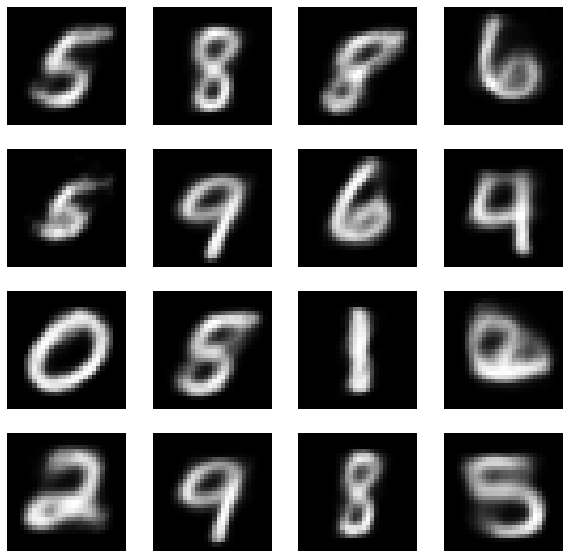

In [ ]:
def generate_images(model, n_images):
    # Sample from the latent space
    random_latent_vectors = tf.random.normal(shape=(n_images, latent_dim))
    # Decode them to fake images
    generated_images = model.decoder(random_latent_vectors)
    generated_images = generated_images.numpy()

    # Calculate the number of rows needed in the subplot grid
    n_rows = int(np.ceil(n_images / 4))

    # Plot the generated images
    plt.figure(figsize=(10, 10))
    for i in range(n_images):
        plt.subplot(n_rows, 4, i + 1)
        plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

# Generate and display images
generate_images(vae, 16)

# 12. <a id='toc12_'></a>[__Conclusion__](#toc0_)

In this demonstration, we have successfully implemented and trained a Variational Autoencoder (VAE) using TensorFlow to generate images based on the MNIST dataset. The process encompassed several critical steps, from importing necessary libraries to training the model, and finally, generating a manifold of digits.